# PART C: NEURAL NETWORKS ON THE CREDIT CARD DATA

## Importing the needed moduels

In [1]:
from nn import NN, Layer, cv_classification_scores_nn
from library import load_breast_cancer_data, load_credit_card_data

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain

import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import time

## LOADING THE DATA

In [2]:
data, target = load_credit_card_data()
data = np.array(data)
target = np.array(target)

## FINDING THE BEST NUMBER OF EPOCHS AND LAYERS. 

Will test for two different depths of the network, with different sizes on each layer. Every layer will have the sigmoid activation function. Since the space of possible architectures are so large, I have used some trial and error to find the two depths that I thought would work well without being to computationally expensive. Plots the area ratio for the 5 runs for each architecture.

### First with two hidden layers with 20 and 10 neurons each and learning rate = 0.001. No regularization parameter added.

In [4]:
l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l4 = Layer(10,1,activation_function = "sigmoid")

nnet = NN()
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l4)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


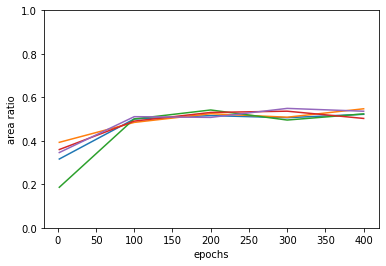

0.5491824079201326


In [9]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400]
# epochs = [50, 100]
time_values = np.zeros(len(epochs))
test_auc = np.zeros(len(epochs))
test_area_ratio = np.zeros(len(epochs))
max_test_area_ratio = 0

n = 5
for _ in range(n):
    for i, epoch in enumerate(epochs):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 10000, alpha = 0.001, lam = 0)
        end_time = time.time()
        
        test_prob = nnet.predict(X_test)
        test_pred = np.where(test_prob >= 0.5, 1, 0)
        
        temp = np.concatenate((1-test_prob, test_prob), axis=1)


        ax = plot_cumulative_gain(y_test, temp)
        plt.close()
        
        lines = ax.lines
        cm =lines[1]
        model_ydata = cm.get_ydata()
        model_xdata = cm.get_xdata()

        area_model_curve = np.trapz(model_ydata, model_xdata)

        area_optimal_curve = 0.788 + 0.5*0.2212

        area_baseline_curve = 0.5

        area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)
        test_auc[i] = roc_auc_score(y_test, test_pred)
        time_values[i] = (end_time - start_time)
        test_area_ratio[i] = area_ratio
    plt.plot(epochs, test_area_ratio)
    if max(test_area_ratio) > max_test_area_ratio:
        max_test_area_ratio = max(test_area_ratio)

plt.xlabel("epochs")
plt.ylabel("area ratio")
plt.ylim((0, 1))
plt.savefig(fname = r"Plots\nn_2_layers_lr_001_test_area_ratio_5_runs.png")
plt.show()

print("Best area ratio", max_test_area_ratio)

## For two hidden layrs with 20 and 10 neurons and learning rate = 0.00001. No regularization parameter added. 

In [3]:
l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l4 = Layer(10,1,activation_function = "sigmoid")

nnet = NN()
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l4)

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5


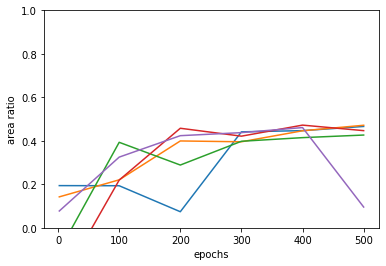

0.47221282168643636


In [5]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400, 500]
# epochs = [50, 100]
time_values = np.zeros(len(epochs))
test_auc = np.zeros(len(epochs))
test_area_ratio = np.zeros(len(epochs))
max_test_area_ratio = 0

n = 5
for _ in range(n):
    for i, epoch in enumerate(epochs):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 10000, alpha = 0.00001, lam = 0)
        end_time = time.time()
        
        test_prob = nnet.predict(X_test)
        test_pred = np.where(test_prob >= 0.5, 1, 0)
        
        temp = np.concatenate((1-test_prob, test_prob), axis=1)


        ax = plot_cumulative_gain(y_test, temp)
        plt.close()
        lines = ax.lines
        
        cm =lines[1]
        model_ydata = cm.get_ydata()
        model_xdata = cm.get_xdata()

        area_model_curve = np.trapz(model_ydata, model_xdata)

        area_optimal_curve = 0.788 + 0.5*0.2212

        area_baseline_curve = 0.5

        area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)
        test_auc[i] = roc_auc_score(y_test, test_pred)
        time_values[i] = (end_time - start_time)
        test_area_ratio[i] = area_ratio
        
    plt.plot(epochs, test_area_ratio)
    if max(test_area_ratio) > max_test_area_ratio:
        max_test_area_ratio = max(test_area_ratio)

plt.xlabel("epochs")
plt.ylabel("area ratio")
plt.ylim((0, 1))
plt.savefig(fname = r"Plots\nn_2_layers_lr_00001_test_area_ratio_5_runs.png")
plt.show()

print("Best area ratio:", max_test_area_ratio)

# Now testing for 4 layers.

## For four hidden layers with 30,20,20 and 10 neurons with sigmoid activation function. Learning rate = 0.001. No regularization added. 

In [6]:
l1_ = Layer(data.shape[1], 30,activation_function= "sigmoid")
l2_ = Layer(30, 20, activation_function = "sigmoid")
l3_ = Layer(20, 20, activation_function = "sigmoid")
l4_ = Layer(20, 10, activation_function = "sigmoid")
l5_ = Layer(10,1,activation_function = "sigmoid")

nnet_ = NN()
nnet_.add_layer(l1_)
nnet_.add_layer(l2_)
nnet_.add_layer(l3_)
nnet_.add_layer(l4_)
nnet_.add_layer(l5_)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


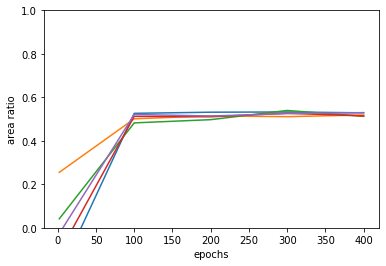

0.5396352485389323


In [7]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400]
# epochs = [50, 100]
time_values = np.zeros(len(epochs))
test_auc = np.zeros(len(epochs))
test_area_ratio = np.zeros(len(epochs))
max_test_area_ratio = 0

n = 5
for _ in range(n):
    for i, epoch in enumerate(epochs):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet_.train(X_train, y_train, epochs = epoch, batch_size = 10000, alpha = 0.001, lam = 0)
        end_time = time.time()
        
        test_prob = nnet_.predict(X_test)
        test_pred = np.where(test_prob >= 0.5, 1, 0)
        
        temp = np.concatenate((1-test_prob, test_prob), axis=1)


        ax = plot_cumulative_gain(y_test, temp)
        plt.close()
        
        lines = ax.lines
        cm =lines[1]
        model_ydata = cm.get_ydata()
        model_xdata = cm.get_xdata()

        area_model_curve = np.trapz(model_ydata, model_xdata)

        area_optimal_curve = 0.788 + 0.5*0.2212

        area_baseline_curve = 0.5

        area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)
        test_auc[i] = roc_auc_score(y_test, test_pred)
        time_values[i] = (end_time - start_time)
        test_area_ratio[i] = area_ratio
        
    plt.plot(epochs, test_area_ratio)
    if max(test_area_ratio) > max_test_area_ratio:
        max_test_area_ratio = max(test_area_ratio)

plt.xlabel("epochs")
plt.ylabel("area ratio")
plt.ylim((0, 1))
# plt.title("Test error for 10 different runs with learning rate = 0.001")
plt.savefig(fname = r"Plots\nn_4_layers_lr_001_test_area_ratio_5_runs.png")
plt.show()

print(max_test_area_ratio)

# Four hidden layers with 30, 20, 20 and 10 neurons. Learning rate = 0.00001. No ragularization parameter. 

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5


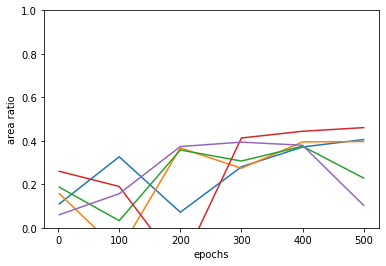

0.46075197868976087


In [10]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400, 500]

time_values = np.zeros(len(epochs))
test_auc = np.zeros(len(epochs))
test_area_ratio = np.zeros(len(epochs))

max_test_area_ratio = 0

n = 5
for _ in range(n):
    for i, epoch in enumerate(epochs):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet_.train(X_train, y_train, epochs = epoch, batch_size = 10000, alpha = 0.00001, lam = 0)
        end_time = time.time()
        
        test_prob = nnet_.predict(X_test)
        test_pred = np.where(test_prob >= 0.5, 1, 0)
        
        temp = np.concatenate((1-test_prob, test_prob), axis=1)


        ax = plot_cumulative_gain(y_test, temp)
        plt.close()
        
        lines = ax.lines
        cm =lines[1]
        model_ydata = cm.get_ydata()
        model_xdata = cm.get_xdata()

        area_model_curve = np.trapz(model_ydata, model_xdata)

        area_optimal_curve = 0.788 + 0.5*0.2212

        area_baseline_curve = 0.5

        area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)
        test_auc[i] = roc_auc_score(y_test, test_pred)
        time_values[i] = (end_time - start_time)
        test_area_ratio[i] = area_ratio
        
    plt.plot(epochs, test_area_ratio)
    if max(test_area_ratio) > max_test_area_ratio:
        max_test_area_ratio = max(test_area_ratio)

plt.xlabel("epochs")
plt.ylabel("area ratio")
plt.ylim((0, 1))
plt.savefig(fname = r"Plots\nn_4_layers_lr_00001_test_area_ratio_5_runs.png")
plt.show()

print(max_test_area_ratio)

# GRID SEARCH FOR FINDING THE OPTIMAL LEARNING RATE AND REGULARIZATION PARAMETERS (I would run the normal python script instead for doing grid-search. The plots gets much nicer. 

In [1]:
from nn import NN, Layer, cv_classification_scores_nn
from library import load_breast_cancer_data, load_credit_card_data

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain

import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

data, target = load_credit_card_data()
data = np.array(data)
target = np.array(target)

l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l4 = Layer(10,1,activation_function = "sigmoid")

nnet = NN()
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l4)

In [ ]:
#DOING A GRID SEARCH FOR FINE TUNING OF THE PARAMETERS.
n_lr_values = 5
lr_values = np.logspace(-6,-2, n_lr_values)

n_reg_lam_values =  6
reg_lam_values = np.logspace(-6,-1,n_reg_lam_values)
auc_scores = np.zeros(shape=(n_lr_values, n_reg_lam_values))
accuracy_scores = np.zeros(shape=(n_lr_values, n_reg_lam_values))
area_ratio_scores = np.zeros(shape=(n_lr_values, n_reg_lam_values))

for i, learning_rate in enumerate(lr_values):
    for j, reg_lam in enumerate(reg_lam_values):
        cv_area_ratio, cv_auc, cv_accuracy = cv_classification_scores_nn(5, data, target, nnet, 300, 10000, learning_rate, reg_lam) 
        auc_scores[i,j] = cv_auc
        accuracy_scores[i,j] = cv_accuracy
        area_ratio_scores[i,j] = cv_area_ratio
        print(auc_scores[i,j])
        print(cv_area_ratio)

#PLOTTING HEATMAPS FOR THE GRIDSEARCH
auc_scores = pd.DataFrame(auc_scores, columns=np.round(reg_lam_values,6), index =np.round(lr_values,6) )
accuracy_scores = pd.DataFrame(accuracy_scores, columns=np.round(reg_lam_values,6), index =np.round(lr_values,6) )

Area-ratio 0.1275815941484015
AUC-score:  0.5650445019386798
Accuracy:  0.7813333333333333
[[4688    3]
 [1309    0]]


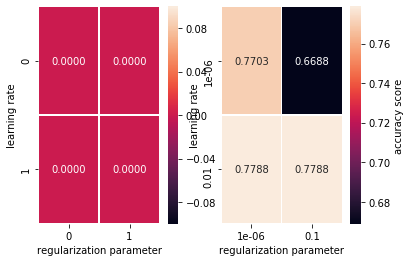

In [3]:
plt.subplot(121)
ax = sns.heatmap(area_ratio_scores, annot=True, fmt=".4f", linewidths=0.5, cbar_kws={"label": "auc score" })
plt.ylim(top = 0, bottom=n_lr_values)
plt.xlabel("regularization parameter")
plt.ylabel("learning rate")

plt.subplot(122)
ax = sns.heatmap(accuracy_scores, annot=True, fmt=".4f", linewidths=0.5, cbar_kws={"label": "accuracy score" })
plt.ylim(top = 0, bottom=n_lr_values)
plt.xlabel("regularization parameter")
plt.ylabel("learning rate")

plt.show()

# PLOTTING THE ROC CURVE AND OTHER METRICS

In [3]:
data, target = load_credit_card_data()
data = np.array(data)
target = np.array(target)

l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l4 = Layer(10,1,activation_function = "sigmoid")

nnet_best = NN()
nnet_best.add_layer(l1)
nnet_best.add_layer(l2)
nnet_best.add_layer(l4)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
nnet_best.train(X_train, y_train, 300, 10000, alpha = 0.001, lam = 0.01)

y_probabilities = nnet_best.predict(X_test)
y_pred = np.where(y_probabilities >= 0.5, 1, 0)

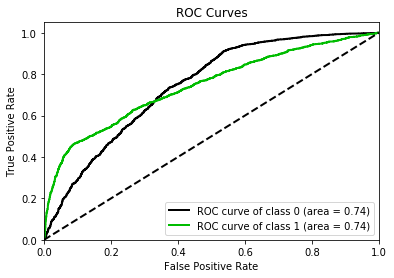

[<matplotlib.lines.Line2D object at 0x0000027DF96D0278>, <matplotlib.lines.Line2D object at 0x0000027DF916ACC0>, <matplotlib.lines.Line2D object at 0x0000027DF916AC50>]
0.4721917218485927


In [30]:
temp = np.concatenate((1-y_probabilities, y_probabilities), axis=1)

plot_roc(y_test, temp,plot_micro=False, plot_macro=False)
plt.show()

ax = plot_cumulative_gain(y_test, temp)
lines = ax.lines
cm =lines[1]
model_ydata = cm.get_ydata()
model_xdata = cm.get_xdata()

area_model_curve = np.trapz(model_ydata, model_xdata)

area_optimal_curve = 0.788 + 0.5*0.2212

area_baseline_curve = 0.5

area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)

print(area_ratio)

We can do calculate the area under the curve multiple times and then take the average to find an accurate value. Also implemented in the cross-valdiation function for neural networks for classification. 

In [9]:
values = []
for i in range(2):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    nnet_best.train(X_train, y_train, 300, 10000, alpha = 0.001, lam = 0.01)

    y_probabilities = nnet_best.predict(X_test)
    y_pred = np.where(y_probabilities >= 0.5, 1, 0)
    
    temp = np.concatenate((1-y_probabilities, y_probabilities), axis=1)

    
    ax = plot_cumulative_gain(y_test, temp)
    plt.close()
    lines = ax.lines
    cm =lines[1]
    model_ydata = cm.get_ydata()
    model_xdata = cm.get_xdata()

    area_model_curve = np.trapz(model_ydata, model_xdata)

    area_optimal_curve = 0.788 + 0.5*0.2212

    area_baseline_curve = 0.5

    area_ratio = (area_model_curve-area_baseline_curve)/(area_optimal_curve - area_baseline_curve)
    
    values.append(area_ratio)

print("Area ratio: ", np.mean(values))
    
    
    
    

0
1
Area ratio:  0.5076693743486684
